## Loading 3D pose output files
This short script demonstrates how to load and visualise the generated datasets.

Each dataset consists of 3 file types:
* **n** images
* **1** 3D pose dataframe
* **1** label lookup table, containing keypoint names

The **.hdf5** formatted file dataframe contains the following entries for each generated image:

*	  file_name &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1 string (relative)
*	  rot_mat	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3 x 3 float
*	  trans_mat	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3 x 1 float
*	  intrinsics_mat &nbsp;&nbsp;&nbsp; 3 x 3 float
*     bounding_box &nbsp;&nbsp;&nbsp; 4 x 1 float
*	  key_points_3D &nbsp;&nbsp;&nbsp;3 x k float (provide name sheet)
*	  key_points_2D &nbsp;&nbsp;&nbsp;2 x k float
*	  visibility &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1 x k int (0 occluded or 1 visible)

In [1]:
import os
import cv2

import numpy as np
import pandas as pd

target_dir = "../example_data/3D/"

out_df = pd.read_hdf(os.path.join(target_dir, "Data_3D_Pose.hdf5"))
out_df

,file_name,cam_rot,cam_trans,cam_intrinsics,bounding_box,key_points_3D,key_points_2D,visibility
0,10_Img_synth.png,"[[-0.167203, 0.850253, 0.499112], [0.957049, 0...","[984.281, -1484.85, 2961.02]","[[2080.000244, 0.0, 416.0], [0.0, 2080.000244,...","[61, 163, 777, 689]","[[1341.706543, -922.786743, 103.304901], [1447...","[[436.656219, 560.209351], [425.553284, 484.94...","[1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, ..."
1,1_Img_synth.png,"[[-0.159017, 0.516459, 0.841417], [0.986722, 0...","[209.07, -519.595, 7532.0]","[[2080.000244, 0.0, 416.0], [0.0, 2080.000244,...","[328, 418, 557, 637]","[[147.890457, -390.044189, 103.304901], [0, 0,...","[[436.688843, 533.972473], [0, 0], [0, 0], [48...","[1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, ..."
2,2_Img_synth.png,"[[0.658679, 0.151756, 0.736961], [-0.281817, -...","[378.519, -290.607, 8121.7]","[[2080.000244, 0.0, 416.0], [0.0, 2080.000244,...","[422, 251, 616, 515]","[[91.628769, -325.443054, 103.304901], [106.26...","[[532.809753, 414.191132], [526.8479, 394.5438...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,3_Img_synth.png,"[[0.211941, 0.963012, 0.166402], [0.768035, -0...","[400.37, 307.377, 8268.64]","[[2080.000244, 0.0, 416.0], [0.0, 2080.000244,...","[251, 351, 529, 622]","[[-1002.507141, -427.642151, 103.304901], [-93...","[[359.258789, 494.866608], [384.248596, 488.65...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, ..."
4,4_Img_synth.png,"[[0.423554, -0.768894, -0.478961], [-0.905236,...","[-108.408, 219.53, 5704.5]","[[2080.000244, 0.0, 416.0], [0.0, 2080.000244,...","[131, 56, 463, 383]","[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0, 0], [0, 0], [0, 0], [0, 0], [361.255676, ...","[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, ..."
5,5_Img_synth.png,"[[-0.713143, -0.402388, 0.57403], [-0.695546, ...","[882.988, 134.552, 7810.43]","[[2080.000244, 0.0, 416.0], [0.0, 2080.000244,...","[331, 235, 604, 524]","[[574.686646, 919.362427, 103.304901], [576.41...","[[464.33255, 371.491577], [472.892212, 385.668...","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
6,6_Img_synth.png,"[[-0.902205, -0.16191, -0.399763], [-0.380167,...","[32.9237, 131.849, 3367.25]","[[2080.000244, 0.0, 416.0], [0.0, 2080.000244,...","[125, 96, 750, 637]","[[-121.864243, -5.426804, 103.304901], [-58.22...","[[481.290253, 268.145294], [458.640228, 329.67...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
7,8_Img_synth.png,"[[0.707353, -0.447476, -0.547189], [-0.654724,...","[-84.346, -552.471, 3684.58]","[[2080.000244, 0.0, 416.0], [0.0, 2080.000244,...","[21, 67, 715, 809]","[[-718.752808, -1035.19043, 103.304901], [-625...","[[263.444946, 441.931427], [344.613007, 475.59...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, ..."
8,9_Img_synth.png,"[[-0.306518, 0.449092, -0.839263], [0.636063, ...","[-636.702, -1758.99, 3443.6]","[[2080.000244, 0.0, 416.0], [0.0, 2080.000244,...","[135, 297, 596, 832]","[[360.448303, 1515.925537, 103.304901], [429.4...","[[306.775391, 680.867188], [329.4422, 606.6062...","[1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, ..."


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def set_axes_equal(ax):
    # workaround, as matplotlib's 3D plot has no option for equisised axes (10/2021)
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

### Load and display 3D coordinates
Change **show_entry** to the id of the sample, you want to examine

Check the dataframe above to see which id corresponds to which image.

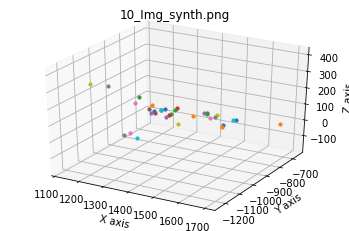

In [3]:
show_entry = 0

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

display_points_3D = out_df.loc[show_entry]["key_points_3D"]
display_img = cv2.imread(os.path.join(target_dir, out_df.loc[show_entry]["file_name"]))

for i,xyz in enumerate(display_points_3D):
    if out_df.loc[show_entry]["visibility"][i] == 1:
        ax.scatter(xyz[0], xyz[1], xyz[2], marker='o',s=10)


"""
# additionally, plot the camera location
ax.scatter(out_df.loc[show_entry]["cam_trans"][0], 
           out_df.loc[show_entry]["cam_trans"][1], 
           out_df.loc[show_entry]["cam_trans"][2], marker='x')
"""

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# use custom function to ensure equal axis proportions
set_axes_equal(ax)

# opens external plot
plt.title(out_df.loc[show_entry]["file_name"])
plt.show()

### Load and display 2D coordinates 
as well as **3D coordinates** projected onto the **camera view**.

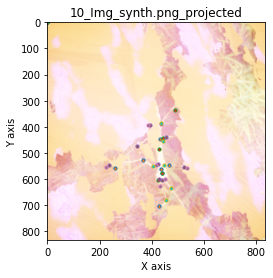

In [4]:
# file_name	cam_rot	cam_trans	cam_intrinsics	bounding_box	key_points_3D	key_points_2D	visibility
R = np.array(out_df.loc[show_entry]["cam_rot"])
T = np.reshape(np.array(out_df.loc[show_entry]["cam_trans"]),(3,1))
C = np.array(out_df.loc[show_entry]["cam_intrinsics"])

fig = plt.figure()
ax = fig.add_subplot()

# display the generated image
ax.imshow(display_img)

for i, x in enumerate(display_points_3D):
    X = np.reshape(np.array(out_df.loc[show_entry]["key_points_3D"][i]),(3,-1))

    # given the above data, it should be possible to project the 3D points into the corresponding image,
    # so they land in the correct position on the image 
    P = C @ np.hstack([R, T])  # projection matrix
    X_hom = np.vstack([X, np.ones(X.shape[1])])  # 3D points in homogenous coordinates

    X_hom = P @ X_hom  # project the 3D points
    
    X_2d = X_hom[:2, :] / X_hom[2, :]  # convert them back to 2D pixel space
    
    gt_x_2d = out_df.loc[show_entry]["key_points_2D"][i][0]
    gt_y_2d = out_df.loc[show_entry]["key_points_2D"][i][1]
    
    ax.scatter(gt_x_2d, gt_y_2d, marker='o', s=10)
    ax.scatter(X_2d[0], display_img.shape[1]-X_2d[1], marker='^', s=2)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')

ax.set_xlim([0,display_img.shape[0]])
ax.set_ylim([0,display_img.shape[1]])
ax.set_aspect('equal')

ax.invert_yaxis()

plt.title(out_df.loc[show_entry]["file_name"] + "_projected")
plt.show()